In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from skbio.stats.composition import ilr
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement
import seaborn as sns
from matplotlib import rcParams
sns.set()
sns.set(font_scale=1.3)

## Load Bacterial Taxonomic Lineages

In [2]:
# Phylum Gram Type Dictionary
BacterialPhylums = {"Acidobacteria":'Gram_Negative',"Actinobacteria":'Gram_Positive',"Aquificae":'Gram_Negative',"Armatimonadetes":'Gram_Negative',"Bacteroidetes":'Gram_Negative',"Balneolaeota":'Unknown',"Caldiserica":"Unknown","Calditrichaeota":"Unknown","Chlamydiae":'Gram_Negative',"Chlorobi":"Unknown","Chloroflexi":"Unknown","Chrysiogenetes":"Unknown","Coprothermobacterota":"Unknown","Cyanobacteria":"Unknown","Deferribacteres":"Gram_Negative","Deinococcus-Thermus":"Gram_Negative","Dictyoglomi":"Gram_Negative","Elusimicrobia":"Unknown","Fibrobacteres":"Unknown","Firmicutes":"Gram_Positive","Fusobacteria":"Gram_Negative","Gemmatimonadetes":"Gram_Negative","Kiritimatiellaeota":"Unkown","Lentisphaerae":"Unknown","Nitrospirae":"Unknown","Planctomycetes":"Unknown","Proteobacteria":"Gram_Negative","Rhodothermaeota":"Unknown","Spirochaetes":"Gram_Negative","Synergistetes":"Gram_Negative","Tenericutes":"Unknown","Thermodesulfobacteria":"Unknown","Thermotogae":"Gram_Negative","Verrucomicrobia":"Unknown"}

In [3]:
accTaxDictDF = pd.read_csv("./Files/Dataframes/Master_Rename.csv")
accTaxDictDF.set_index("Bacterial_Strain", inplace=True)
accTaxDictDF.head()

,Accession,TaxID,Species,Genus,Family,Order,Class,Phylum
Bacterial_Strain,,,,,,,,
Clostridioides_difficile_QCD66c26,NZ_CM000441.1,455631,Clostridioides_difficile,Clostridioides,Peptostreptococcaceae,Clostridiales,Clostridia,Firmicutes
Bacillus_cereus_m1293_strainm1293,NZ_CM000714.1,526973,Bacillus_cereus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_mycoides_DSM_2048_strainDSM_2048,NZ_CM000742.1,526997,Bacillus_mycoides,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_cereus_AH1273_strainAH1273,NZ_CM000741.1,526994,Bacillus_cereus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_pseudofirmus_OF4_strainOF4,NC_013791.2,398511,Bacillus_pseudofirmus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes


## LOAD SPECIES ABUNDANCE DFs

In [4]:
japaneseSpeciesALL = pd.read_csv("./Files/Dataframes/speciesDataframes/masterJapanese_allSpecies.csv").set_index("SampleName")
crcSpeciesALL = pd.read_csv("./Files/Dataframes/speciesDataframes/masterCRC_allSpecies.csv").set_index("SampleName")

In [5]:
japaneseSpecies90 = pd.read_csv("./Files/Dataframes/speciesDataframes/masterJapanese_90%Prev_Species.csv").set_index("SampleName")
crcSpecies90 = pd.read_csv("./Files/Dataframes/speciesDataframes/masterCRC_90%Prev_Species.csv").set_index("SampleName")

In [6]:
japaneseSpecies100 = pd.read_csv("./Files/Dataframes/speciesDataframes/masterJapanese_100%Prev_Species.csv").set_index("SampleName")
crcSpecies100 = pd.read_csv("./Files/Dataframes/speciesDataframes/masterCRC_100%Prev_Species.csv").set_index("SampleName")

In [7]:
print("Healthy "+str(japaneseSpecies90.shape))
print("crc "+str(crcSpecies90.shape))

Healthy (178, 150)
crc (74, 153)


In [8]:
#with open('./Files/CRCFiles.txt', 'w') as f:
#    for item in list(crcSpecies90.index):
#        f.write(str(item)+", ")

## Load Genera Abundance DFs

In [9]:
japaneseGeneraALL = pd.read_csv("./Files/Dataframes/genusDataframes/masterJapanese_allGenera.csv").set_index("SampleName")
crcGeneraALL = pd.read_csv("./Files/Dataframes/genusDataframes/masterCRC_allGenera.csv").set_index("SampleName")

## Load Phylum Abundance DFs

In [10]:
japanesePhylumALL = pd.read_csv("./Files/Dataframes/phylumDataframes/masterJapanese_allPhylum.csv").set_index("SampleName")
crcPhylumALL = pd.read_csv("./Files/Dataframes/phylumDataframes/masterCRC_allPhylum.csv").set_index("SampleName")

## Explore the Community

In [11]:
# These are total unique species across all cohorts
HundredSetHealthyUniquSpecies = list(japaneseSpecies100.columns)
NinetySetHealthyUniqueSpecies = list(japaneseSpecies90.columns)

print(len(HundredSetHealthyUniquSpecies))
print(len(NinetySetHealthyUniqueSpecies))

37
150


In [14]:
# Strains 0% dataframes cohort names added.
jAllspecies = japaneseSpeciesALL.copy()
crcAllspecies = crcSpeciesALL.copy()
jAllspecies['Cohort'] = 'Healthy'
crcAllspecies['Cohort'] = 'CRC'

j100species = japaneseSpecies100.copy()
crc100species = crcSpecies100.copy()
j100species['Cohort'] = 'Healthy'
crc100species['Cohort'] = 'CRC'


j90species = japaneseSpecies90.copy()
crc90species = crcSpecies90.copy()
j90species['Cohort'] = 'Healthy'
crc90species['Cohort'] = 'CRC'



jALLgenera = japaneseGeneraALL.copy()
crcALLgenera = crcGeneraALL.copy()
jALLgenera['Cohort'] = 'Healthy'
crcALLgenera['Cohort'] = 'CRC'


jALLphlyum = japanesePhylumALL.copy()
crcALLphlyum = crcPhylumALL.copy()
jALLphlyum['Cohort'] = 'Healthy'
crcALLphlyum['Cohort'] = 'CRC'

## START MERGING INTO LARGE ALL COHORT DFs

In [15]:
globalSpeciesAll = pd.concat([jAllspecies,crcAllspecies], sort=True)
globalSpecies100 = pd.concat([j100species,crc100species], sort=True)
globalSpecies90 = pd.concat([j90species,crc90species], sort=True)

globalGeneraAll = pd.concat([jALLgenera,crcALLgenera], sort=True)
globalPhylumAll = pd.concat([jALLphlyum,crcALLphlyum], sort=True)

In [17]:
globalSpeciesAll.to_csv("./Files/Dataframes/allCohorts_allSpecies.csv")
globalSpecies100.to_csv("./Files/Dataframes/allCohorts_100Prev_Species.csv")
globalSpecies90.to_csv("./Files/Dataframes/allCohorts_90Prev_Species.csv")

globalGeneraAll.to_csv("./Files/Dataframes/allCohorts_allGenera.csv")
globalPhylumAll.to_csv("./Files/Dataframes/allCohorts_allPhylum.csv")

## Grab Species for Networks

In [18]:
# GENERATE A NEW DATAFRAME WITH ORIGINAL RELATIVE ABUNDANCES WITH SAMPLES AND SHARED SPECIES ABOVE 90% PREVALENCE.
# These will not be normalized until undergoing CLR

BSDF_90 = globalSpeciesAll[list(globalSpecies90.columns)].copy()
BSDF_100 = globalSpeciesAll[list(globalSpecies100.columns)].copy()

BSDF_90.to_csv("./Files/Dataframes/allCohorts_90PrevSpecies.csv")
BSDF_100.to_csv("./Files/Dataframes/allCohorts_100PrevSpecies.csv")

In [19]:
from tqdm import tqdm

paper90 = BSDF_90.copy()
paper90.drop(columns=['Cohort'],inplace=True)
clr_paper90 = paper90.copy()

for row in tqdm(paper90.index):
    clr_paper90.loc[row] = clr(np.array(paper90.loc[row].replace(0.0, 1e-10)))
    
clr_paper90['Cohort'] = globalSpeciesAll['Cohort'].copy()

CLR_Healthy_Union = clr_paper90[clr_paper90['Cohort']=='Healthy'].copy()
CLR_CRC_Union = clr_paper90[clr_paper90['Cohort']=='CRC'].copy()

CLR_Healthy_Union.drop(columns=['Cohort'], inplace=True)
CLR_CRC_Union.drop(columns=['Cohort'], inplace=True)

100%|██████████| 252/252 [00:00<00:00, 418.21it/s]


In [20]:
CLR_Healthy_Union.to_csv("./Files/Dataframes/Healthy_Union_CLR.csv")
CLR_CRC_Union.to_csv("./Files/Dataframes/CRC_Union_CLR.csv")

## View Prevalence Distribution

In [21]:
def pullPrevalence(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], 'Cohort':[]}
    
    df2 = df[df['Cohort']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['Cohort'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['Cohort'].append(cohortname)
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [24]:
def pullPrevalenceAbundance(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], "Mean_Relative_Abundance":[], 'Cohort':[]}
    
    df2 = df[df['Cohort']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['Cohort'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['Cohort'].append(cohortname)
        tempdic['Mean_Relative_Abundance'].append(df2[column].mean())
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [25]:
jprev = pullPrevalence(globalSpeciesAll,'Healthy','Species')
crcprev = pullPrevalence(globalSpeciesAll,'CRC','Species')

In [26]:
allPrevalence = pd.concat([jprev, crcprev]).set_index("Bacterial_Species")
allPrevalence.to_csv("./Files/Dataframes/Prevalence/allCohorts_speciesPrevalence.csv")
allPrevalence.head()

,Prevalence,Cohort
Bacterial_Species,,
Abiotrophia_defectiva,0.359551,Healthy
Absiella_dolichum,0.994382,Healthy
Acetanaerobacterium_elongatum,0.016854,Healthy
Acetitomaculum_ruminis,0.112360,Healthy
Acetivibrio_ethanolgignens,0.988764,Healthy


In [27]:
jprevA = pullPrevalenceAbundance(globalSpeciesAll,'Healthy','Species')
crcprevA = pullPrevalenceAbundance(globalSpeciesAll,'CRC','Species')

allPrevalenceAbundance = pd.concat([jprevA, crcprevA]).set_index("Bacterial_Species")
allPrevalenceAbundance.to_csv("./Files/Dataframes/Prevalence/allCohorts_speciesPrevalenceAbundance.csv")
allPrevalenceAbundance.head()

,Prevalence,Mean_Relative_Abundance,Cohort
Bacterial_Species,,,
Abiotrophia_defectiva,0.359551,0.000071,Healthy
Absiella_dolichum,0.994382,0.000543,Healthy
Acetanaerobacterium_elongatum,0.016854,0.000014,Healthy
Acetitomaculum_ruminis,0.112360,0.000018,Healthy
Acetivibrio_ethanolgignens,0.988764,0.000264,Healthy


In [36]:
##############################################################################################################

In [37]:
sns.reset_orig()

In [38]:
sns.set()
sns.set(font_scale=1.3)

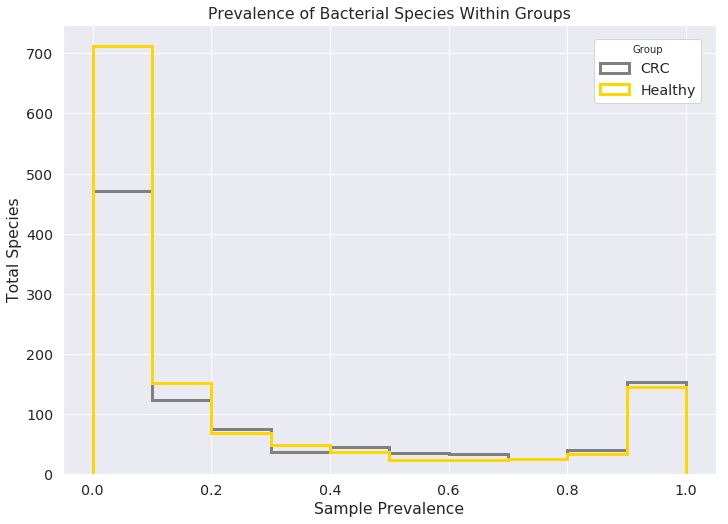

In [29]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

palette ={"Healthy":'gold', "CRC":'grey'}


#sns.set_palette(palette=palette.values())
for Cohort in set(allPrevalence['Cohort']):
    subset = allPrevalence[allPrevalence['Cohort'] == Cohort].copy()
    sns_hist = sns.distplot(subset['Prevalence'], color=palette[Cohort] ,hist = True, kde = False, bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], label = Cohort, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
    
# Plot formatting
plt.title('Prevalence of Bacterial Species Within Groups')
plt.xlabel('Sample Prevalence')
plt.ylabel('Total Species')
plt.legend(loc=1, borderaxespad=1,framealpha=1, edgecolor='lightgrey', facecolor='white', title='Group')
plt.show()
fig = sns_hist.get_figure()
#fig.savefig("PrevalenceOfSpecies_bins.pdf", dpi=300, bbox_inches='tight')
prevalenceFigure=fig
plt.show()

In [30]:
def pullCohort90Abundance(df, cohort, cohort90columns):
    temp90AbundanceDictionary = {"SampleName":[], "Cohort":[], "Prevalent_Species_Total_Abundance":[]}
    for sample in list(globalSpeciesAll[globalSpeciesAll['Cohort']==cohort].index):
            temp90AbundanceDictionary['SampleName'].append(sample)
            temp90AbundanceDictionary['Cohort'].append(cohort)
            temp90AbundanceDictionary['Prevalent_Species_Total_Abundance'].append(globalSpeciesAll.loc[sample][cohort90columns.columns].sum())

    tempDF = pd.DataFrame(data=temp90AbundanceDictionary)
    return(tempDF.set_index("SampleName"))

In [32]:
jprevA90 = pullCohort90Abundance(allPrevalenceAbundance, 'Healthy', japaneseSpecies90)
crcprevA90 = pullCohort90Abundance(allPrevalenceAbundance,'CRC', crcSpecies90)

allPrevalenceAbundance90 = pd.concat([jprevA90, crcprevA90])
allPrevalenceAbundance90.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
DRR127524,Healthy,0.423940
DRR127532,Healthy,0.729581
DRR127535,Healthy,0.436086
DRR127537,Healthy,0.286716
DRR127546,Healthy,0.925051


In [33]:
def pullCohort90UnionAbundance(df, cohort):
    df2 = df[df["Cohort"]==cohort].copy()
    df2.drop(columns=['Cohort'], inplace=True)
    
    temp90AbundanceDictionary = {"SampleName":[], "Cohort":[], "Prevalent_Species_Total_Abundance":[]}
    for sample in list(df2.index):
            temp90AbundanceDictionary['SampleName'].append(sample)
            temp90AbundanceDictionary['Cohort'].append(cohort)
            temp90AbundanceDictionary['Prevalent_Species_Total_Abundance'].append(df2.loc[sample].sum())

    tempDF = pd.DataFrame(data=temp90AbundanceDictionary)
    return(tempDF.set_index("SampleName"))

In [34]:
#Generate Dataframe containing all species of the union for 90% for all samples. 
unionColumns = list(globalSpecies90.columns)
UnionSpeciesGlobal = globalSpeciesAll[unionColumns].copy()

In [35]:
healthyprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal,'Healthy')
CRCprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal, 'CRC')


allPrevalenceAbundanceU90 = pd.concat([healthyprevA90, CRCprevA90])
allPrevalenceAbundanceU90.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
DRR127524,Healthy,0.932340
DRR127532,Healthy,0.752851
DRR127535,Healthy,0.847662
DRR127537,Healthy,0.345312
DRR127546,Healthy,0.926597


In [36]:
tempPrevDF = allPrevalenceAbundance90.copy()
for i in tempPrevDF.index:
    tempPrevDF.at[i,'Cohort'] = str(allPrevalenceAbundance90.at[i,'Cohort'])+" AC"

tempPrevDF2 = allPrevalenceAbundanceU90.copy()
for i in tempPrevDF2.index:
    tempPrevDF2.at[i,'Cohort'] = str(allPrevalenceAbundanceU90.at[i,'Cohort'])+" Sig"

tempPrevCombine = pd.concat([tempPrevDF,tempPrevDF2])
tempPrevCombine.sort_values(by='Cohort', inplace=True)
tempPrevCombine.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
DRR171910,CRC AC,0.910626
DRR171688,CRC AC,0.715379
DRR171685,CRC AC,0.861673
DRR171684,CRC AC,0.792979
DRR171683,CRC AC,0.862156


In [37]:
CoreAbundance_DF = tempPrevCombine.copy()
for i in set(CoreAbundance_DF.Cohort):
    print(i)
    print(np.median(list(CoreAbundance_DF[CoreAbundance_DF['Cohort']==i]['Prevalent_Species_Total_Abundance'])))

CRC AC
0.8462181375170277
Healthy AC
0.8057395148174546
Healthy Sig
0.8665460882720011
CRC Sig
0.8483442207171291


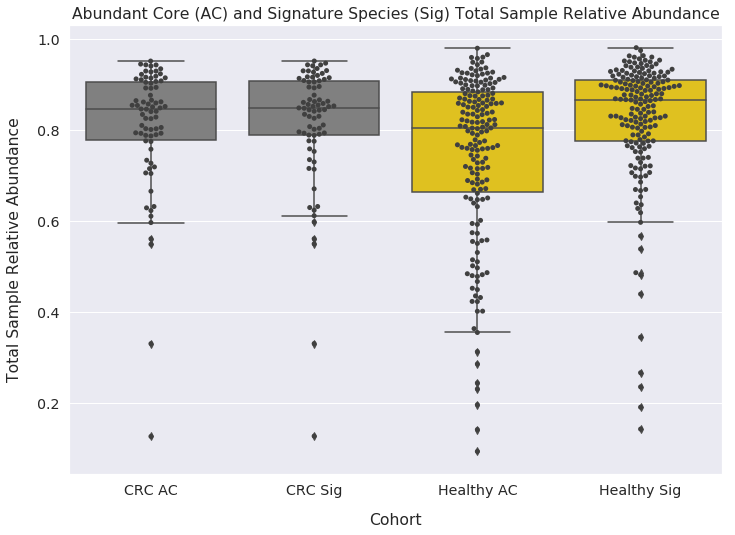

In [38]:
sns.set()
sns.set(font_scale=1.3)
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
palette ={'Healthy AC':'gold', 'Healthy Sig':'gold', 'CRC AC':'grey','CRC Sig':'grey'}
coList = set(allPrevalenceAbundance90.Cohort)
        
ax = sns.boxplot(x='Cohort', y='Prevalent_Species_Total_Abundance', hue="Cohort", data=tempPrevCombine, palette=palette, dodge=False)
ax = sns.swarmplot(x="Cohort", y="Prevalent_Species_Total_Abundance", data=tempPrevCombine, color=".25")

ax.set_title("Abundant Core (AC) and Signature Species (Sig) Total Sample Relative Abundance")
ax.set_ylabel('Total Sample Relative Abundance', labelpad=15)
ax.set_xlabel('Cohort', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

# Put the legend out of the figure
legend = ax.legend()
legend.remove()
fig = ax.get_figure()
abundanceFigure=fig
plt.show()

In [39]:
allPrevalenceAbundance90['Prevalent_Species_Total_Abundance'].median()

0.8180499280048322

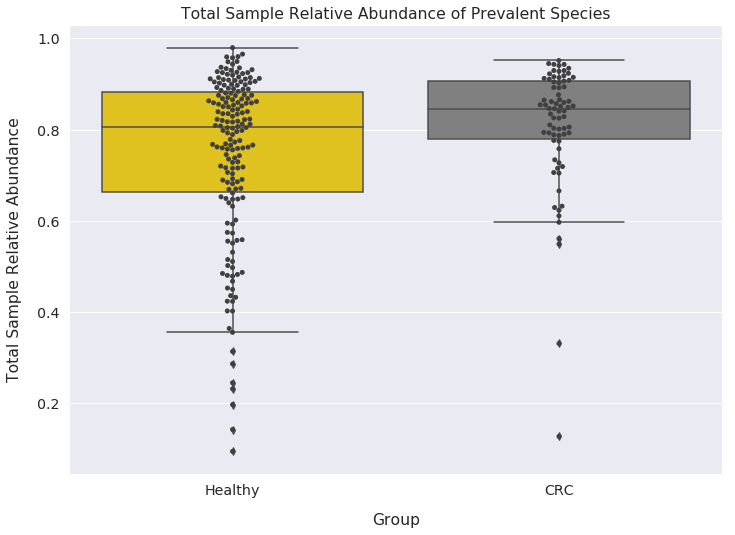

In [40]:
sns.set()
sns.set(font_scale=1.3)
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
palette ={'Healthy':'gold','CRC':'grey'}
coList = set(allPrevalenceAbundance90.Cohort)
        
ax = sns.boxplot(x='Cohort', y='Prevalent_Species_Total_Abundance', hue="Cohort", data=allPrevalenceAbundance90, palette=palette, dodge=False)
ax = sns.swarmplot(x="Cohort", y="Prevalent_Species_Total_Abundance", data=allPrevalenceAbundance90, color=".25")

ax.set_title("Total Sample Relative Abundance of Prevalent Species")
ax.set_ylabel('Total Sample Relative Abundance', labelpad=15)
ax.set_xlabel('Group', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

# Put the legend out of the figure
legend = ax.legend()
legend.remove()

fig = ax.get_figure()
abundanceFigure=fig
plt.show()

## View Community Richness of Samples

In [41]:
globalSpeciesAll.replace(0.0, np.nan, inplace=True)
SampleStrainCount = {"Sample":[], "Species_Count":[], "Cohort":[]}
for i in globalSpeciesAll.index:
    SampleStrainCount['Sample'].append(i)
    SampleStrainCount['Cohort'].append(globalSpeciesAll.at[i, "Cohort"])
    SampleStrainCount['Species_Count'].append(int(len(globalSpeciesAll.loc[i].dropna())))

SpeciesRichnessDF = pd.DataFrame(data=SampleStrainCount)
SpeciesRichnessDF.head()

,Sample,Species_Count,Cohort
0,DRR127524,371,Healthy
1,DRR127532,348,Healthy
2,DRR127535,291,Healthy
3,DRR127537,306,Healthy
4,DRR127546,337,Healthy


In [42]:
tempSpeciesALL= {"Cohort":["Healthy","CRC"], "Species":[len(japaneseSpeciesALL.columns),len(crcSpeciesALL.columns)],"DataFrame":["0% prevalence","0% prevalence"]}
tempSpeciesDFALL = pd.DataFrame(data=tempSpeciesALL)

tempGeneraALL= {"Cohort":["Healthy","CRC"], "Genera":[len(japaneseGeneraALL.columns),len(crcGeneraALL.columns)],"DataFrame":["0% prevalence","0% prevalence"]}
tempGeneraDFALL = pd.DataFrame(data=tempGeneraALL)

tempPhylumALL= {"Cohort":["Healthy","CRC"], "Phylums":[len(japanesePhylumALL.columns),len(crcPhylumALL.columns)],"DataFrame":["0% prevalence","0% prevalence"]}
tempPhylumDFALL = pd.DataFrame(data=tempPhylumALL)

tempDict_Species90 = {"Cohort":["Healthy","CRC"], "Species":[len(japaneseSpecies90.columns),len(crcSpecies90.columns)], "DataFrame":["90% prevalence", "90% prevalence"]}
tempDF_Species90 = pd.DataFrame(data=tempDict_Species90)

tempDict_Species100 = {"Cohort":["Healthy","CRC"], "Species":[len(japaneseSpecies100.columns),len(crcSpecies100.columns)], "DataFrame":["100% prevalence","100% prevalence"]}
tempDF_Species100 = pd.DataFrame(data=tempDict_Species100)

In [43]:
#This will look at all healthy cohorts and find what species are unique to them compared to total. CRC will compare to all healthy. 
def pullUniqueSpeciesForCohort(df, disease):
    
    tempDict = {"Cohort":[],"Total_Species":[], "Unique_Species":[], "Shared_Species":[]}
    organismDict = {}
    df2 = df.replace(0.0, np.nan).copy()
    
    cohortNames = [x for x in set(df2['Cohort'])]
    
    for cohort in cohortNames:
        cohortSet = set(df2[df2['Cohort']==cohort].dropna(thresh=1, axis=1).columns)
        otherSet = set(df2[df2['Cohort']!=cohort].dropna(thresh=1, axis=1).columns)
        
        cohortSet.remove("Cohort")
        otherSet.remove("Cohort")

        tempDict['Cohort'].append(cohort)
        tempDict['Total_Species'].append(len(cohortSet))
        organismDict[cohort] = [(cohortSet - otherSet)]
        tempDict['Unique_Species'].append(len(cohortSet - otherSet))
        tempDict['Shared_Species'].append(len(cohortSet) - len(cohortSet - otherSet))
        
    tempdf = pd.DataFrame(data=tempDict)
    return tempdf, organismDict

In [44]:
#This will look at all healthy cohorts and find what species are unique to them compared to total. CRC will compare to all healthy. 
def pullUniqueSpeciesForCohort2(df, disease, taxlevel):
    
    tempDict = {"Cohort":[],"Total_"+taxlevel:[], "Unique_"+taxlevel:[], "Shared_"+taxlevel:[]}
    organismDict = {}
    df2 = df.replace(0.0, np.nan).copy()
    
    cohortNames = [x for x in set(df2['Cohort'])]
    
    for cohort in cohortNames:
        cohortSet = set(df2[df2['Cohort']==cohort].dropna(thresh=1, axis=1).columns)
        otherSet = set(df2[df2['Cohort']!=cohort].dropna(thresh=1, axis=1).columns)
        
        cohortSet.remove("Cohort")
        otherSet.remove("Cohort")

        tempDict['Cohort'].append(cohort)
        tempDict['Total_'+taxlevel].append(len(cohortSet))
        organismDict[cohort] = [(cohortSet - otherSet)]
        tempDict['Unique_'+taxlevel].append(len(cohortSet - otherSet))
        tempDict['Shared_'+taxlevel].append(len(cohortSet) - len(cohortSet - otherSet))
        
    tempdf = pd.DataFrame(data=tempDict)
    return tempdf, organismDict

In [45]:
#ALL STRAINS  (Total is split between unique and shared)
UniqueSpeciesDF_ALL1, uniqueSpeciesDict_ALL = pullUniqueSpeciesForCohort(globalSpeciesAll, 'CRC')
UniqueSpeciesDF_ALL = UniqueSpeciesDF_ALL1.sort_values(by=['Unique_Species']).drop(columns=['Total_Species'])
UniqueSpeciesDF_ALL

,Cohort,Unique_Species,Shared_Species
0,CRC,88,951
1,Healthy,321,951


In [46]:
UniqueSpeciesDF_ALL.rename(columns={'Unique_Species':"Unique Species","Shared_Species":"Shared Species"}, inplace=True)

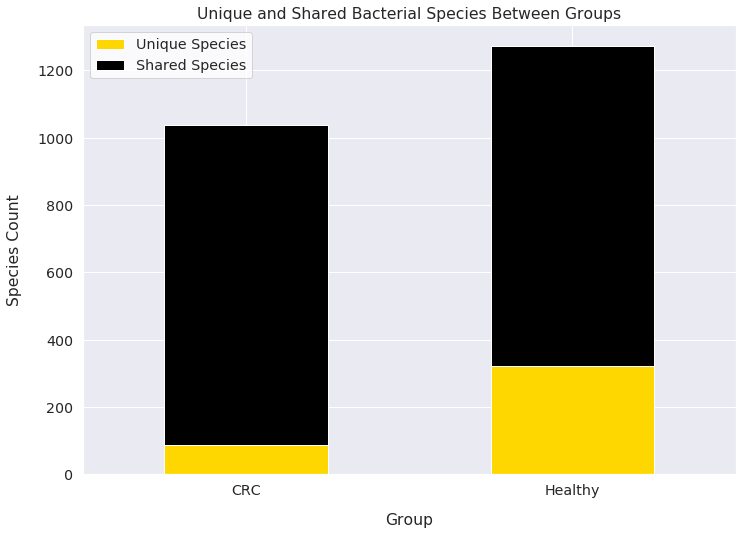

In [47]:
## Look at shared and Unique at 0% Prevalence
sns.set(font_scale=1.3)
rcParams['figure.figsize'] = 11.7,8.27
UniqueSpeciesDF_ALL.plot(kind='bar', stacked=True, x='Cohort', color=['gold','black'])
plt.ylabel("Species Count", labelpad=15)
plt.xlabel('Group', labelpad=15)
plt.title("Unique and Shared Bacterial Species Between Groups")
ax.set_xticklabels(ax.get_xticklabels())

# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0, prop={'size': 14})
plt.legend(facecolor='white')
plt.xticks(rotation=0)
plt.show()

In [48]:
##################################################################################################################

In [49]:
#ALL 90% Prevalent Strains 
UniqueSpeciesDF_90Prev1, uniqueSpeciesDict_90Prev = pullUniqueSpeciesForCohort(globalSpecies90, 'CRC')
UniqueSpeciesDF_90Prev = UniqueSpeciesDF_90Prev1.sort_values(by=['Unique_Species']).drop(columns=['Total_Species'])
UniqueSpeciesDF_90Prev

,Cohort,Unique_Species,Shared_Species
1,Healthy,5,145
0,CRC,8,145


In [50]:
UniqueSpeciesDF_90Prev.rename(columns={'Unique_Species':"Unique Species","Shared_Species":"Shared Species"}, inplace=True)

In [51]:
uniqueSpeciesDict_90Prev

{'CRC': [{'Anaerotignum_neopropionicum',
   'Bifidobacterium_catenulatum',
   'Haemophilus_parainfluenzae',
   'Intestinibacillus_massiliensis',
   'Neglecta_timonensis',
   'Prevotella_copri',
   'Ruminococcus_bicirculans',
   'Streptococcus_mitis'}],
 'Healthy': [{'Clostridium_saccharolyticum',
   'Hespellia_stercorisuis',
   'Monoglobus_pectinilyticus',
   'Odoribacter_laneus',
   'Streptococcus_sp_oral_taxon_431'}]}

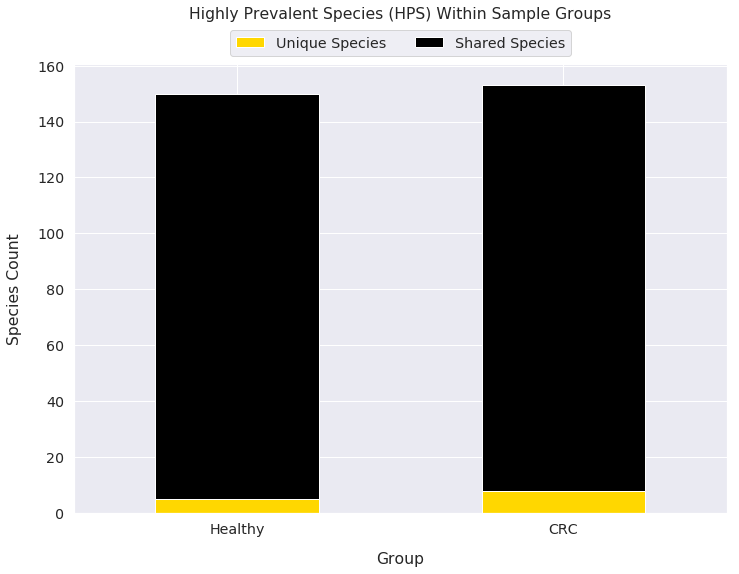

In [52]:
UniqueSpeciesDF_90Prev.plot(kind='bar', stacked=True, x='Cohort', color=['gold','black'])
#for p in splot.patches:
#    splot.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("Species Count", labelpad=15)
plt.title("Highly Prevalent Species (HPS) Within Sample Groups", pad=45)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 14})
plt.xticks(rotation=0)

plt.xlabel('Group', labelpad=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09),
          fancybox=True, ncol=2)
plt.xticks(rotation=0)


#plt.tight_layout()
plt.show()

In [55]:
#ALL 90% Prevalent Strains (These numbers are the total split)
UniqueGenusDF1, uniqueGenusDict_90Prev = pullUniqueSpeciesForCohort2(globalGeneraAll, 'CRC', 'Genera')
UniqueGenusDF = UniqueGenusDF1.sort_values(by=['Unique_Genera']).drop(columns=['Total_Genera'])
UniqueGenusDF

,Cohort,Unique_Genera,Shared_Genera
0,CRC,24,342
1,Healthy,106,342


In [56]:
#ALL 90% Prevalent Strains 
UniquePhylumDF1, uniquePhylumDict_90Prev = pullUniqueSpeciesForCohort2(globalPhylumAll, 'CRC', 'Phylums')
UniquePhylumDF = UniquePhylumDF1.sort_values(by=['Unique_Phylums']).drop(columns=['Total_Phylums'])
UniquePhylumDF

,Cohort,Unique_Phylums,Shared_Phylums
0,CRC,0,14
1,Healthy,0,14


In [57]:
phylumHeat= globalPhylumAll.drop(columns='Cohort')
phylumHeat.head()

,Actinobacteria,Bacteroidetes,Candidatus_Saccharibacteria,Chloroflexi,Deinococcus-Thermus,Firmicutes,Fusobacteria,Lentisphaerae,Proteobacteria,Spirochaetes,Synergistetes,Tenericutes,Unclassified_Bacteria,Verrucomicrobia
SampleName,,,,,,,,,,,,,,
DRR127524,0.006919,0.625104,0.000043,0.0,0.000000,0.320488,0.000031,0.000031,0.045000,0.000014,0.000185,0.0,0.000119,0.000056
DRR127532,0.041777,0.348119,0.000253,0.0,0.000052,0.497925,0.000067,0.000000,0.108823,0.000000,0.001698,0.0,0.000041,0.000000
DRR127535,0.137095,0.605517,0.000000,0.0,0.000000,0.222196,0.000000,0.000514,0.032504,0.000000,0.000000,0.0,0.000356,0.000000
DRR127537,0.385479,0.133544,0.000081,0.0,0.000000,0.358045,0.000036,0.000000,0.120957,0.000000,0.000000,0.0,0.000076,0.000064
DRR127546,0.003135,0.630182,0.000072,0.0,0.000000,0.352802,0.000024,0.000000,0.010614,0.000556,0.000000,0.0,0.000552,0.000000


In [58]:
phylumHeat2 = phylumHeat.copy()
phylumHeat2['Cohort'] = globalPhylumAll['Cohort'].copy()

In [59]:
phylumHeat2.replace(0.0,np.nan, inplace=True)

In [60]:
tempPhylumDictionary = {'Phylum':[], 'Mean_Relative_Abundance':[],'Cohort':[]}
for cohort in set(phylumHeat2.Cohort):
    for column in phylumHeat2.dropna(axis=1, thresh=1).columns:
        if column == 'Cohort':
            continue
        else:
            tempPhylumDictionary['Phylum'].append(column)
            tempPhylumDictionary['Mean_Relative_Abundance'].append(float(phylumHeat2[phylumHeat2['Cohort']==cohort][column].mean()))
            tempPhylumDictionary['Cohort'].append(cohort)
            
tempPhylumDF = pd.DataFrame(data=tempPhylumDictionary)
tempPhylumDF.set_index("Cohort", inplace=True)
tempPhylumDF.head()

,Phylum,Mean_Relative_Abundance
Cohort,,
CRC,Actinobacteria,0.058189
CRC,Bacteroidetes,0.510880
CRC,Candidatus_Saccharibacteria,0.000061
CRC,Chloroflexi,0.000015
CRC,Deinococcus-Thermus,0.000046


In [61]:
tempphylum2 = tempPhylumDF.reset_index().copy()
tempphylum2.sort_values(by='Mean_Relative_Abundance', ascending=False, inplace=True)
tempphylum2.head()

,Cohort,Phylum,Mean_Relative_Abundance
1,CRC,Bacteroidetes,0.510880
15,Healthy,Bacteroidetes,0.504985
19,Healthy,Firmicutes,0.379671
5,CRC,Firmicutes,0.358963
0,CRC,Actinobacteria,0.058189


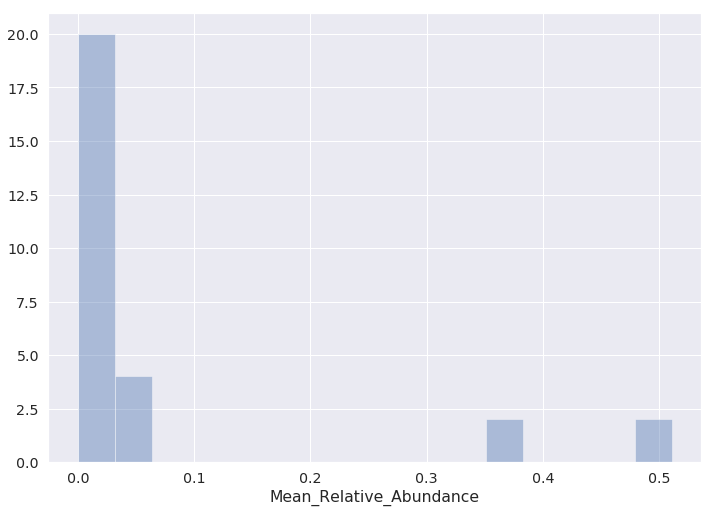

In [62]:
sns.distplot(tempphylum2['Mean_Relative_Abundance'],kde=False)

In [63]:
pieDF = pd.DataFrame(columns=list(set(tempphylum2[tempphylum2['Mean_Relative_Abundance']>0.02]['Phylum'])), index=list(set(tempphylum2['Cohort'])))

In [64]:
pieDF.fillna(0.0, inplace=True)
pieDF['Others'] = 0.0

In [65]:
pieDF

,Firmicutes,Actinobacteria,Proteobacteria,Bacteroidetes,Others
CRC,0.0,0.0,0.0,0.0,0.0
Healthy,0.0,0.0,0.0,0.0,0.0


In [66]:
for row in tempphylum2.index:
    if tempphylum2.at[row,'Phylum'] in pieDF.columns:
        pieDF.at[tempphylum2.at[row,'Cohort'], tempphylum2.at[row,"Phylum"]] = tempphylum2.at[row,'Mean_Relative_Abundance']
    else:        
        pieDF.at[tempphylum2.at[row,'Cohort'], "Others"] += tempphylum2.at[row,'Mean_Relative_Abundance']
pieDF

,Firmicutes,Actinobacteria,Proteobacteria,Bacteroidetes,Others
CRC,0.358963,0.058189,0.051903,0.510880,0.029478
Healthy,0.379671,0.049372,0.050651,0.504985,0.026078


In [67]:
pieDF = pieDF.reindex((pieDF.mean().sort_values().index)[::-1], axis=1)

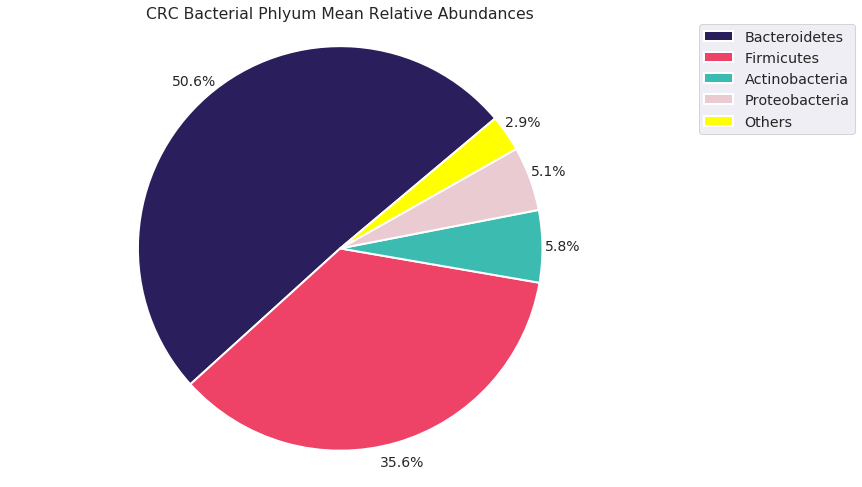

In [69]:
# Pie chart
labels = [k for k in pieDF.columns]
sizes = [k for k in list(pieDF.loc['CRC'])]
fig1, ax1 = plt.subplots()
colors = ['#2A1E5C', '#EE4266', '#3CBBB1', '#EACBD2', 'yellow', '#FA7921','grey']
plt.pie(sizes, startangle=40, wedgeprops = {'linewidth': 2}, autopct='%1.1f%%', colors=colors, pctdistance=1.10, rotatelabels=True, textprops={'fontsize': 14})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=labels)
plt.axis('equal')

plt.title("CRC Bacterial Phlyum Mean Relative Abundances")
plt.show()

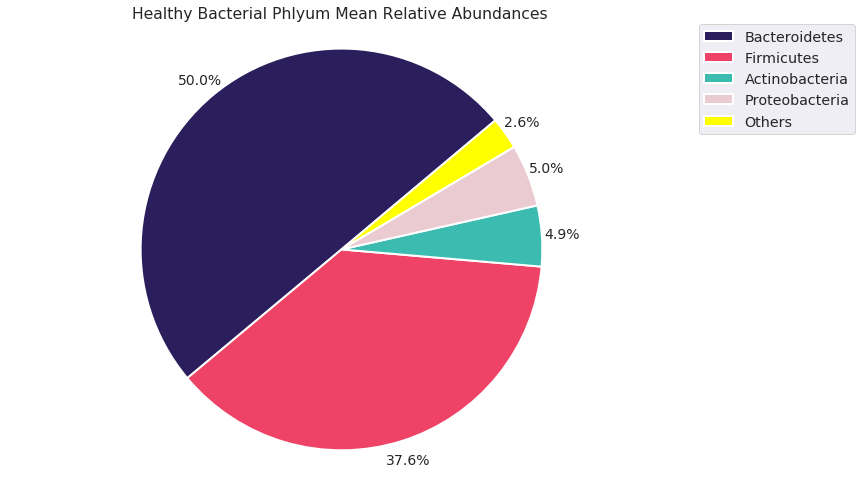

In [70]:
# Pie chart
labels = [k for k in pieDF.columns]
sizes = [k for k in list(pieDF.loc['Healthy'])]
fig1, ax1 = plt.subplots()
colors = ['#2A1E5C', '#EE4266', '#3CBBB1', '#EACBD2', 'yellow', '#FA7921','grey']

plt.pie(sizes, startangle=40, autopct='%1.1f%%', wedgeprops = {'linewidth': 2},colors=colors, pctdistance=1.10, rotatelabels=True, textprops={'fontsize': 14})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=labels)
plt.axis('equal')

plt.title("Healthy Bacterial Phlyum Mean Relative Abundances")
plt.show()

## Look at Species, Genus, Phylum of all Strains above noise threshold

In [71]:
allSpecies00 = globalSpeciesAll.copy()
allSpecies00['Cohort'] = globalSpeciesAll['Cohort'].copy()

allGenusAll = globalGeneraAll.copy()
allGenusAll['Cohort'] = globalGeneraAll['Cohort'].copy()

allPhylum00 = globalPhylumAll.copy()
allPhylum00['Cohort'] = globalPhylumAll['Cohort'].copy()

In [72]:
allPhylumsDF = allPhylum00.copy()
allPhylumsDF.replace(0.0, np.nan, inplace=True)
SamplePhylumCount = {"Sample":[], "Phylum_Count":[], "Cohort":[]}

for i in allPhylumsDF.index:
    SamplePhylumCount['Sample'].append(i)
    SamplePhylumCount['Cohort'].append(allPhylumsDF.at[i, "Cohort"])
    SamplePhylumCount['Phylum_Count'].append(int(len(allPhylumsDF.loc[i].dropna()))-1)

samplePhylumDF = pd.DataFrame(data=SamplePhylumCount)

In [73]:
tempPhylumDFALL

,Cohort,Phylums,DataFrame
0,Healthy,14,0% prevalence
1,CRC,14,0% prevalence


In [74]:
#cohortStrains00 = te.set_index('Cohort').drop(columns=["DataFrame"]).copy()
cohortSpecies00 = tempSpeciesDFALL.set_index('Cohort').drop(columns=["DataFrame"]).copy()
cohortGenus00 =  tempGeneraDFALL.set_index('Cohort').drop(columns=["DataFrame"]).copy()
cohortPhylum00 = tempPhylumDFALL.set_index('Cohort').copy()

In [75]:
tempBugDF1 = {"Cohort":[], "Count":[], "Taxonomic_Level":[]}
for row in cohortPhylum00.index:
    tempBugDF1['Cohort'].append(row)
    tempBugDF1['Count'].append(cohortPhylum00.at[row,"Phylums"])
    tempBugDF1['Taxonomic_Level'].append("Phlyum")
for row in cohortGenus00.index:
    tempBugDF1['Cohort'].append(row)
    tempBugDF1['Count'].append(cohortGenus00.at[row,"Genera"])
    tempBugDF1['Taxonomic_Level'].append("Genera")
for row in cohortSpecies00.index:
    tempBugDF1['Cohort'].append(row)
    tempBugDF1['Count'].append(cohortSpecies00.at[row,"Species"])
    tempBugDF1['Taxonomic_Level'].append("Species")
    
bugDF1 = pd.DataFrame(data=tempBugDF1).set_index("Cohort")
bugDF1

,Count,Taxonomic_Level
Cohort,,
Healthy,14,Phlyum
CRC,14,Phlyum
Healthy,448,Genera
CRC,366,Genera
Healthy,1272,Species
CRC,1039,Species


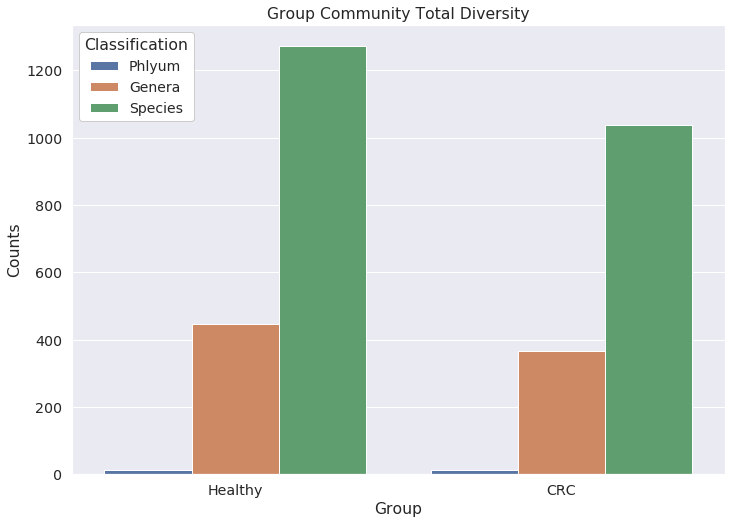

In [77]:
sns.barplot(data=bugDF1, hue='Taxonomic_Level', y='Count', x=bugDF1.index)
from matplotlib import rcParams
palette ={'Healthy':'C2', 'CRC':'C3'}
sns.set(font_scale=1.3)
rcParams['figure.figsize'] = 11.7,8.27

plt.title("Group Community Total Diversity")
plt.xlabel("Group")
plt.ylabel("Counts")

legend = plt.legend(frameon = 1, framealpha=1, prop={'size': 14}, title = 'Classification', loc=2)
frame = legend.get_frame()
frame.set_facecolor('white')
plt.show()

## Perform CLR Transformations

In [78]:
print(clr_paper90.shape)
clr_paper90.head()

(252, 159)


,Absiella_dolichum,Acetivibrio_ethanolgignens,Agathobaculum_desmolans,Alistipes_finegoldii,Alistipes_obesi,Alistipes_putredinis,Alistipes_senegalensis,Alistipes_shahii,Anaerobutyricum_hallii,Anaerostipes_hadrus,...,Streptococcus_salivarius,Streptococcus_sp_A12,Streptococcus_sp_FDAARGOS_192,Streptococcus_sp_oral_taxon_431,Subdoligranulum_variabile,Traorella_massiliensis,Tyzzerella_nexilis,Veillonella_dispar,bacterium_LF-3,Cohort
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,0.649757,-0.910198,-0.627496,0.440586,1.166678,1.050679,-0.179089,1.943157,0.362506,0.011422,...,4.420293,0.855761,3.232824,0.009375,0.634528,-1.322902,0.868137,2.219966,-1.098679,Healthy
DRR127532,-1.480139,-2.373398,-0.859782,0.289740,-2.030241,0.645481,-0.561597,2.276417,1.582008,1.669690,...,-0.255271,-1.294303,-1.167036,-0.568764,0.221685,-2.005511,1.185634,-0.366136,-2.798491,Healthy
DRR127535,-1.111969,-0.773725,-0.899283,0.917088,0.599484,2.577229,-1.362164,1.261910,2.352814,2.982397,...,1.257186,-1.628960,0.475316,-2.306923,1.029147,-0.324411,1.257312,-1.707184,-0.179677,Healthy
DRR127537,0.754179,0.059043,0.586730,1.329389,-11.835279,2.926851,-11.835279,1.034134,4.135353,6.946327,...,6.323430,3.554903,5.107446,4.088420,1.917844,0.712347,3.897864,6.133094,1.699365,Healthy
DRR127546,0.023721,-0.916301,-0.736046,3.172818,-1.305990,4.374705,-0.541281,-0.104039,1.237539,1.458311,...,-1.537053,-2.597027,-2.350908,-2.376693,-0.019583,-0.302369,1.313516,-0.875283,-0.314138,Healthy


In [79]:
## Add a pseudocount to 0.0 value organisms in order to perform ILR transformations on dataframes (NORMALIZED)
from skbio.stats.composition import multiplicative_replacement
from skbio.stats.composition import clr
from tqdm import tqdm

GSpdf = globalSpeciesAll.drop(columns='Cohort').copy()
GSpdf.fillna(0.0, inplace=True)
clr_Allspecies = pd.DataFrame(columns=GSpdf.columns, index=GSpdf.index)
for row in tqdm(GSpdf.index):
    clr_Allspecies.loc[row] = clr(np.array(GSpdf.loc[row].replace(0.0, 1e-10)))
    
print(clr_Allspecies.shape)
clr_Allspecies.head()

100%|██████████| 252/252 [00:07<00:00, 31.78it/s]

(252, 1360)


,Abiotrophia_defectiva,Absiella_dolichum,Acetanaerobacterium_elongatum,Acetitomaculum_ruminis,Acetivibrio_ethanolgignens,Acholeplasma_axanthum,Acholeplasma_brassicae,Acholeplasma_modicum,Acidaminococcus_fermentans,Acidaminococcus_intestini,...,Yersinia_rohdei,Yersinia_ruckeri,Yokenella_regensburgei,Youngiibacter_fragilis,Zhihengliuella_sp_ISTPL4,bacterium_A52C2,bacterium_LF-3,bacterium_MS4,endosymbiont_TC1_of_Trimyema_compressum,nan
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,8.03872,11.8628,-3.87661,-3.87661,10.3028,-3.87661,-3.87661,-3.87661,8.36263,9.93671,...,-3.87661,-3.87661,-3.87661,-3.87661,-3.87661,-3.87661,10.1144,-3.87661,-3.87661,-3.87661
DRR127532,-3.69501,10.5408,-3.69501,-3.69501,9.64756,-3.69501,-3.69501,-3.69501,-3.69501,-3.69501,...,-3.69501,-3.69501,-3.69501,-3.69501,-3.69501,-3.69501,9.22247,-3.69501,-3.69501,-3.69501
DRR127535,-3.06678,11.0868,-3.06678,-3.06678,11.425,-3.06678,-3.06678,-3.06678,-3.06678,-3.06678,...,-3.06678,-3.06678,-3.06678,-3.06678,-3.06678,-3.06678,12.0191,-3.06678,-3.06678,-3.06678
DRR127537,-3.16302,9.42644,-3.16302,-3.16302,8.73131,-3.16302,-3.16302,-3.16302,13.2518,12.5691,...,-3.16302,-3.16302,-3.16302,-3.16302,-3.16302,-3.16302,10.3716,-3.16302,-3.16302,-3.16302
DRR127546,-3.53037,12.2963,-3.53037,-3.53037,11.3563,-3.53037,-3.53037,-3.53037,-3.53037,9.31575,...,-3.53037,-3.53037,-3.53037,-3.53037,-3.53037,8.62604,11.9585,-3.53037,-3.53037,-3.53037


In [80]:
clr_Allspecies['Cohort'] = globalSpeciesAll['Cohort'].copy()

In [81]:
clr_Allspecies['Cohort'].value_counts()

Healthy    178
CRC         74
Name: Cohort, dtype: int64

In [82]:
clr_paper90['Cohort'].value_counts()

Healthy    178
CRC         74
Name: Cohort, dtype: int64

## New Network

In [84]:
newNetworkSpeciesDF = pd.read_csv("./Files/GGM/RFC_DA_Run/RFC_DA_SpeciesAbundance.csv").set_index("SampleName")

In [85]:
from skbio.stats.composition import clr

def produceCLRDF(df):
    df2 = df.drop(columns=['Cohort']).copy()
    df2.fillna(0.0, inplace=True)
    
    df3 = df2.copy()
    for row in df2.index:
        df3.loc[row] = clr(np.array(df2.loc[row].replace(0.0, 1e-10)))

    df3_wCohort = df3.copy()
    df3_wCohort['Cohort']=df['Cohort'].copy()
    
    return(df3_wCohort)

In [87]:
newNet_CLR = produceCLRDF(newNetworkSpeciesDF)
newNet_CLR.head(10)

,Faecalitalea_cylindroides,Parabacteroides_sp_CT06,Bacteroides_coprocola,Faecalicatena_contorta,Parvimonas_micra,Dorea_longicatena,Eubacterium_ramulus,Fusobacterium_nucleatum,Haemophilus_parainfluenzae,Butyricimonas_faecalis,...,Bacteroides_nordii,Mediterranea_massiliensis,Bacteroides_helcogenes,Parabacteroides_goldsteinii,Lachnospiraceae_bacterium_GAM79,Bacteroides_thetaiotaomicron,Bacteroides_cellulosilyticus,Clostridium_glycyrrhizinilyticum,Bacteroides_vulgatus,Cohort
SampleName,,,,,,,,,,,,,,,,,,,,,
DRR127524,0.467906,2.011473,3.591295,-1.764292,-2.009970,1.863230,1.585135,-14.760072,4.241283,2.141661,...,-1.288377,4.020356,-2.591635,2.186232,3.980048,2.387402,-0.432781,-0.675777,3.548475,Healthy
DRR127532,2.407230,3.468495,3.337842,-0.050519,-2.547424,4.194122,0.989509,-15.284920,-1.229122,1.782209,...,-1.100535,0.448406,-1.653423,0.720982,1.974746,3.673960,2.872369,0.856593,3.792804,Healthy
DRR127535,-1.203473,2.327604,4.400412,-1.238026,-14.693369,1.961880,1.861454,-14.693369,0.546862,0.316124,...,1.338309,2.911712,-2.693988,-0.556277,2.672184,2.461475,0.525696,0.788190,0.729933,Healthy
DRR127537,2.298754,3.831740,5.042022,0.549862,2.177497,6.083569,4.411153,1.067484,8.170861,-11.729938,...,3.424682,3.629369,2.147099,-11.729938,2.801658,2.894814,-11.729938,3.640229,9.165383,Healthy
DRR127546,-0.163976,1.557400,5.591260,0.222307,-2.990245,1.358118,1.479077,-15.421633,0.646313,1.509763,...,-1.667950,2.185874,-1.179382,-1.132999,4.469895,3.993435,-0.595749,-0.346067,4.884780,Healthy
DRR127552,0.117144,2.454365,4.842100,-0.766026,-2.084581,-1.985649,1.498515,-14.295151,3.697588,2.409822,...,0.870034,3.108475,-0.951252,0.781550,1.720070,3.739806,1.238160,1.420433,7.328867,Healthy
DRR127583,0.051173,2.856043,4.722611,0.553312,-14.755524,2.322702,2.192254,-14.755524,-1.016985,1.816280,...,1.312487,2.586586,0.350603,-0.214321,5.219674,3.876967,0.488134,0.685808,4.455200,Healthy
DRR127588,1.112544,4.492996,4.936104,0.572491,-15.049166,1.557958,0.643928,-3.487526,0.401207,1.536350,...,0.399127,-0.373358,-0.603194,0.356641,4.548917,4.481065,0.240383,1.277539,3.597395,Healthy
DRR127596,1.273001,3.287212,3.332796,0.159594,0.423155,1.386267,3.872126,3.342392,7.659281,-1.156588,...,-0.295498,1.441209,-13.102990,-13.102990,3.151304,5.211090,-0.401197,2.481235,5.276487,Healthy


## Run the PCA

In [88]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def runPCA(dataframe, filename, title):
    pcaDF2 = dataframe.reset_index().drop("SampleName",axis=1).copy()
    pcaDF3 = pcaDF2.drop("Cohort", axis=1).copy()
    features = pcaDF3.columns
    x = pcaDF3.loc[:, features].values
    y = pcaDF2.loc[:,['Cohort']].values
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).copy()
    finalDf = pd.concat([principalDf, pcaDF2[['Cohort']]], axis = 1).copy()
    import seaborn as sns
    from matplotlib import rcParams
    palette ={'Healthy':'gold', 'CRC':'grey'}

    rcParams['figure.figsize'] = 11.7,8.27
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1 ('+str("%.2f" % (100*pca.explained_variance_ratio_[0]))+"% variance)", labelpad=15)
    ax.set_ylabel('Principal Component 2 ('+str("%.2f" % (100*pca.explained_variance_ratio_[1]))+"% variance)", labelpad=15)
    ax.set_title('Principal Component Analysis ('+title+')')

    targets = ['Healthy','CRC']
    colors = ['gold','grey']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf ['Cohort'] == target
        ax.scatter(finalDf .loc[indicesToKeep, 'principal component 1']
                   , finalDf .loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
        
    ax.legend(targets, bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0, title='Group', prop={'size': 14}, facecolor='white')
    rcParams['figure.figsize'] = 11.7,8.27
    ax = sns.set(font_scale=1.3)
    #plt.savefig("./Files/Images/"+filename+".pdf", bbox_inches='tight', dpi=300)
    plt.show()

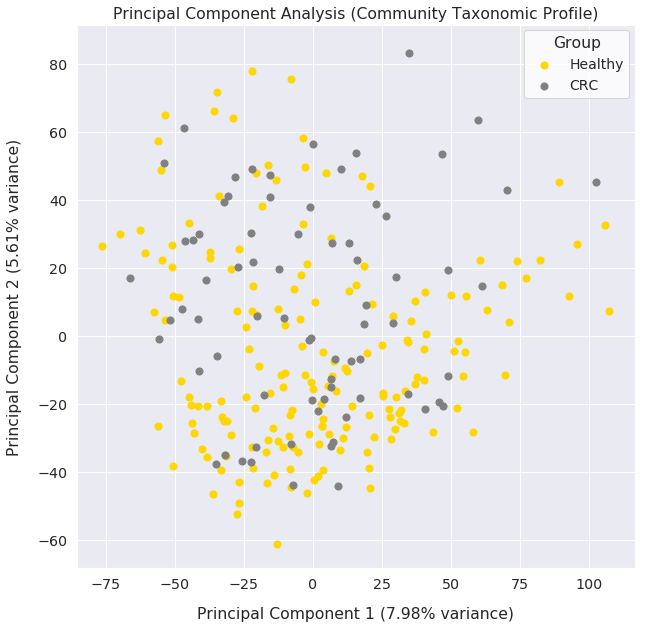

In [89]:
runPCA(clr_Allspecies, 'Healthy_CRC_AllSpecies', 'Community Taxonomic Profile')

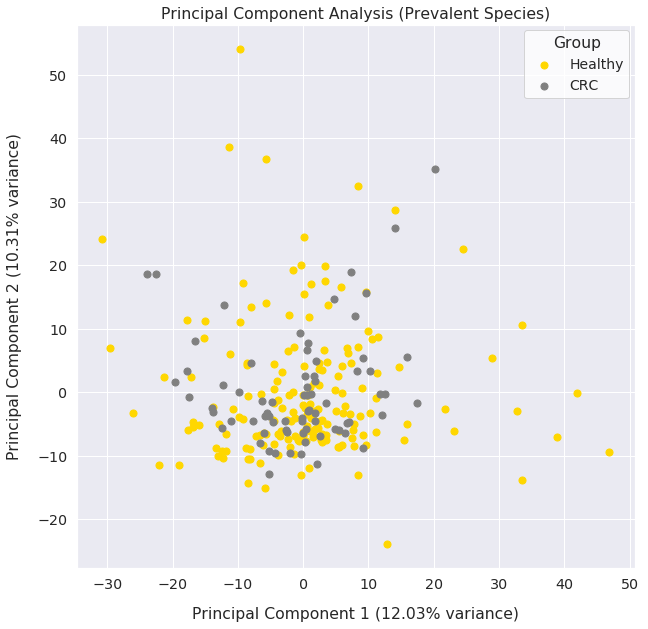

In [90]:
runPCA(clr_paper90, 'Healthy_CRC_SigSpecies', 'Prevalent Species')

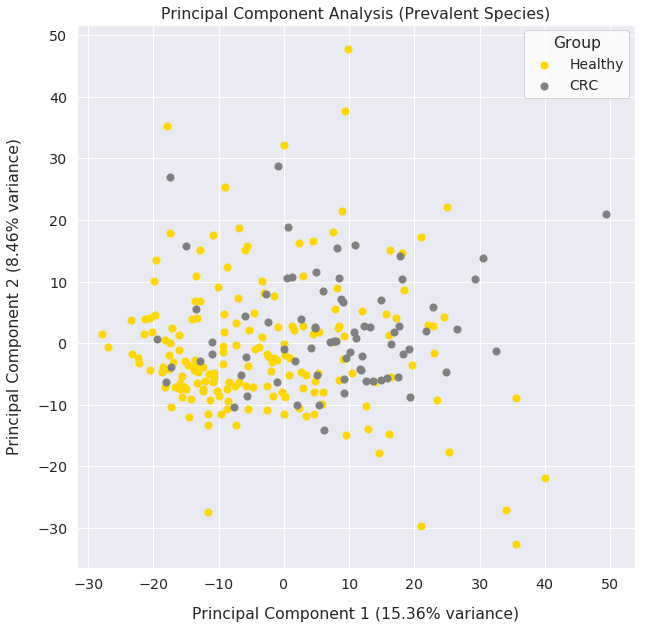

In [91]:
runPCA(newNet_CLR, 'Healthy_CRC_SigSpecies', 'Prevalent Species')